In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from skimage import data

In [5]:
df = pd.read_csv('./data/sample.csv')

In [6]:
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [8]:
null_df = pd.DataFrame({'Null_Values': df.isna().sum().sort_values(ascending = False), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)}).reset_index()
null_df

,index,Null_Values,Percentage
0,action_taken_name,0,0.00
1,agency_name,0,0.00
2,applicant_ethnicity_name,0,0.00
3,applicant_income_000s,24518,13.94
4,applicant_race_name_1,0,0.00
5,applicant_sex_name,0,0.00
6,co_applicant_ethnicity_name,0,0.00
7,co_applicant_race_name_1,0,0.00
8,co_applicant_sex_name,0,0.00
9,county_name,485,0.28


In [9]:
df.applicant_ethnicity_name.unique()

# Why is the information whether an applicant is "Hispanic or Latino" so important for the application process?
# Why is the ethnicity / race so important at all? Are there statistics about loan default rates according to ethnicity?

array(['Not Hispanic or Latino', 'Not applicable', 'Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application'],
      dtype=object)

In [10]:
df.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

In [11]:
# Shortening 'Information not provided by applicant in mail, Internet, or telephone application' in applicant_sex_name

df = df.replace('Information not provided by applicant in mail, Internet, or telephone application', 'No information')

<AxesSubplot:>

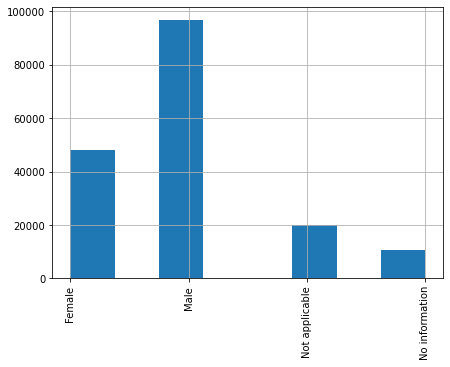

In [12]:
df.applicant_sex_name.hist(bins = 8, figsize = [7 , 5], xrot = 90)

In [13]:
# Creating a column with 1 for any kind of loan approval and 0 for all loan denials and file closures.

df['loan_approved'] = np.where(
   (df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Loan purchased by the institution') | (df.action_taken_name == 'Application approved but not accepted'), 1, 0)

In [14]:
df[df.loan_approved == 0]['loan_approved'].groupby(df.applicant_sex_name).count()

applicant_sex_name
Female            16625
Male              32280
No information     4950
Not applicable      600
Name: loan_approved, dtype: int64

applicant_sex_name
Female            AxesSubplot(0.125,0.125;0.775x0.755)
Male              AxesSubplot(0.125,0.125;0.775x0.755)
No information    AxesSubplot(0.125,0.125;0.775x0.755)
Not applicable    AxesSubplot(0.125,0.125;0.775x0.755)
Name: action_taken_name, dtype: object

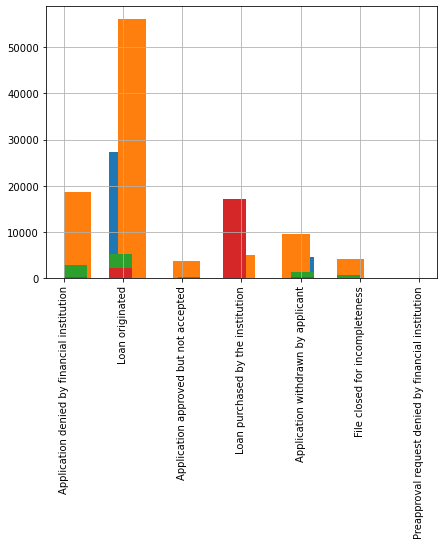

In [15]:
df.action_taken_name.groupby(df.applicant_sex_name).hist(bins = 13, figsize = [7 , 5], xrot = 90)

In [40]:
# DENIAL REASONS

den_loan = df[df.action_taken_name == 'Application denied by financial institution']['action_taken_name'].count() + df[df.action_taken_name == 'Preapproval request denied by financial institution']['action_taken_name'].count()
den_reason_1 = df.denial_reason_name_1.count()

print('Number of denied loan applications: ', den_loan)
print('Number of filled in denial reasons: ', den_reason_1)
print('Difference: ', den_loan - den_reason_1)

Number of denied loan applications:  32008
Number of filled in denial reasons:  23067
Difference:  8941


In [79]:
# Which are the main reasons for a loan application rejection?

pd.DataFrame({'d_reason_1': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count(),
              'd_reason_2': df.denial_reason_name_2.groupby(df.denial_reason_name_2).count(),
              'd_reason_3': df.denial_reason_name_3.groupby(df.denial_reason_name_3).count(),
              'total': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count() + df.denial_reason_name_2.groupby(df.denial_reason_name_2).count() + df.denial_reason_name_3.groupby(df.denial_reason_name_3).count()})

# The reasons options are redundand, but the bank clerk doesn't have to fill them in as the null value rates show.

,d_reason_1,d_reason_2,d_reason_3,total
Collateral,4524,537,113,5174
Credit application incomplete,2855,228,34,3117
Credit history,5544,1115,166,6825
Debt-to-income ratio,6402,935,134,7471
Employment history,260,203,16,479
"Insufficient cash (downpayment, closing costs)",559,513,117,1189
Mortgage insurance denied,51,26,5,82
Other,2068,761,271,3100
Unverifiable information,804,332,64,1200


In [82]:
loan = pd.DataFrame({'total_gender': df.groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_approved': df[df.action_taken_name == 'Loan originated'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_bought': df[df.action_taken_name == 'Loan purchased by the institution'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'approved_not_accepted': df[df.action_taken_name == 'Application approved but not accepted'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'application_witdrawn': df[df.action_taken_name == 'Application withdrawn by applicant'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'file_closed_incompleteness': df[df.action_taken_name == 'File closed for incompleteness'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_denied': (df[(df.action_taken_name == 'Application denied by financial institution') | 
                                    (df.action_taken_name == 'Preapproval request denied by financial institution')].groupby('applicant_sex_name')['applicant_sex_name'].count())}).reset_index()

loan['loan_approved_%'] = round(loan.loan_approved / loan.total_gender * 100, 2)
loan['loan_bought_%'] = round(loan.loan_bought / loan.total_gender * 100, 2)
loan['approved_not_accepted_%'] = round(loan.approved_not_accepted / loan.total_gender * 100, 2)
loan['application_witdrawn_%'] = round(loan.application_witdrawn / loan.total_gender * 100, 2)
loan['file_closed_incompleteness_%'] = round(loan.file_closed_incompleteness / loan.total_gender * 100, 2)
loan['loan_denied_%'] = round(loan.loan_denied / loan.total_gender * 100, 2)

loan = loan[['applicant_sex_name', 'total_gender', 'loan_approved', 'loan_approved_%', 'loan_bought', 'loan_bought_%', 'approved_not_accepted', 'approved_not_accepted_%', 'application_witdrawn', 'application_witdrawn_%', 'loan_denied', 'loan_denied_%', 'file_closed_incompleteness', 'file_closed_incompleteness_%']]

loan

#-----------------------------------------------------------------------------------------------------------------
# There seems to be no (serious) gender bias in the loan approval rates. 
# The denial rate with women is only 2.1 percent points higher than with men. This can happen for various reasons.
#-----------------------------------------------------------------------------------------------------------------

,applicant_sex_name,total_gender,loan_approved,loan_approved_%,loan_bought,loan_bought_%,approved_not_accepted,approved_not_accepted_%,application_witdrawn,application_witdrawn_%,loan_denied,loan_denied_%,file_closed_incompleteness,file_closed_incompleteness_%
0,Female,48030,27415,57.08,2404,5.01,1586,3.30,4559,9.49,10232,21.30,1834,3.82
1,Male,96939,56031,57.80,4965,5.12,3663,3.78,9610,9.91,18595,19.18,4075,4.20
2,No information,10726,5311,49.52,104,0.97,361,3.37,1379,12.86,2833,26.41,738,6.88
3,Not applicable,20167,2225,11.03,17209,85.33,133,0.66,217,1.08,348,1.73,35,0.17


In [163]:
# SEX / GENDER:
# Does the data reveal gender biases in decision making?
#-------------------------------------------------------

decisions = sorted(df.action_taken_name.unique())
dec = pd.DataFrame(decisions)

def bank_action(task):
    calc1, calc2, calc3 = [],[],[]

    if task == 1: # Total no of applications by gender
        for i in decisions:
            calc1.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count())
            df_calc1 = pd.DataFrame(calc1).reset_index(drop = True)
        result_calc1 = pd.concat([dec, df_calc1.fillna(0).astype(int)], axis = 1)
        result_calc1.columns = ['Total no of applications by gender', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        result_calc1['total'] = list(df.applicant_sex_name.groupby(df.action_taken_name).count())
        return(result_calc1)
    elif task == 2: # Share of all applications by gender in %
        for i in decisions:
            calc2.append(round(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count() / df.shape[0] * 100, 2))
            df_calc2 = pd.DataFrame(calc2).reset_index(drop = True)
        result_calc2 = pd.concat([dec, df_calc2.fillna(0)], axis = 1)
        result_calc2.columns = ['Share of all applications by gender in %', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        return(result_calc2)
    elif task == 3: # Share of gender-specific applications in %
        for i in decisions:
            calc3.append(round(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count() / df.applicant_sex_name.groupby(df.applicant_sex_name).count() * 100, 2))
            df_calc3 = pd.DataFrame(calc3).reset_index(drop = True)
        result_calc3 = pd.concat([dec, df_calc3.fillna(0)], axis = 1)
        result_calc3.columns = ['Share of applications by gender-specific total in %', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        result_calc3['Mean'] = list(round(df.applicant_sex_name.groupby(df.action_taken_name).count() / df.applicant_sex_name.count() * 100, 2))
        return(result_calc3)

In [164]:
bank_action(1)

,Total no of applications by gender,Female,Male,No information,Not applicable / diverse,total
0,Application approved but not accepted,1586,3663,361,133,5743
1,Application denied by financial institution,10232,18592,2833,348,32005
2,Application withdrawn by applicant,4559,9610,1379,217,15765
3,File closed for incompleteness,1834,4075,738,35,6682
4,Loan originated,27415,56031,5311,2225,90982
5,Loan purchased by the institution,2404,4965,104,17209,24682
6,Preapproval request denied by financial instit...,0,3,0,0,3


In [165]:
bank_action(2)

,Share of all applications by gender in %,Female,Male,No information,Not applicable / diverse
0,Application approved but not accepted,0.90,2.08,0.21,0.08
1,Application denied by financial institution,5.82,10.57,1.61,0.20
2,Application withdrawn by applicant,2.59,5.46,0.78,0.12
3,File closed for incompleteness,1.04,2.32,0.42,0.02
4,Loan originated,15.59,31.86,3.02,1.27
5,Loan purchased by the institution,1.37,2.82,0.06,9.79
6,Preapproval request denied by financial instit...,0.00,0.00,0.00,0.00


In [166]:
bank_action(3)

,Share of applications by gender-specific total in %,Female,Male,No information,Not applicable / diverse,Mean
0,Application approved but not accepted,3.30,3.78,3.37,0.66,3.27
1,Application denied by financial institution,21.30,19.18,26.41,1.73,18.20
2,Application withdrawn by applicant,9.49,9.91,12.86,1.08,8.96
3,File closed for incompleteness,3.82,4.20,6.88,0.17,3.80
4,Loan originated,57.08,57.80,49.52,11.03,51.73
5,Loan purchased by the institution,5.01,5.12,0.97,85.33,14.03
6,Preapproval request denied by financial instit...,0.00,0.00,0.00,0.00,0.00


In [24]:
#-----------------------------------------------------------------------------------------------------------------
# There seems to be no (serious) sex / gender bias in the loan approval rates. 
# The denial rate with women is only 2.1 percent points higher than with men. This can happen for various reasons.
#-----------------------------------------------------------------------------------------------------------------

In [153]:
# COUNTIES

# Distribution of counties containing the property

df.groupby('county_name')['county_name'].count().sort_values(ascending=False)

county_name
Suffolk County      18063
Nassau County       15431
Queens County       15142
Kings County        13436
Erie County         10134
                    ...  
Delaware County       367
Schoharie County      358
Yates County          344
Schuyler County       255
Hamilton County        91
Name: county_name, Length: 62, dtype: int64

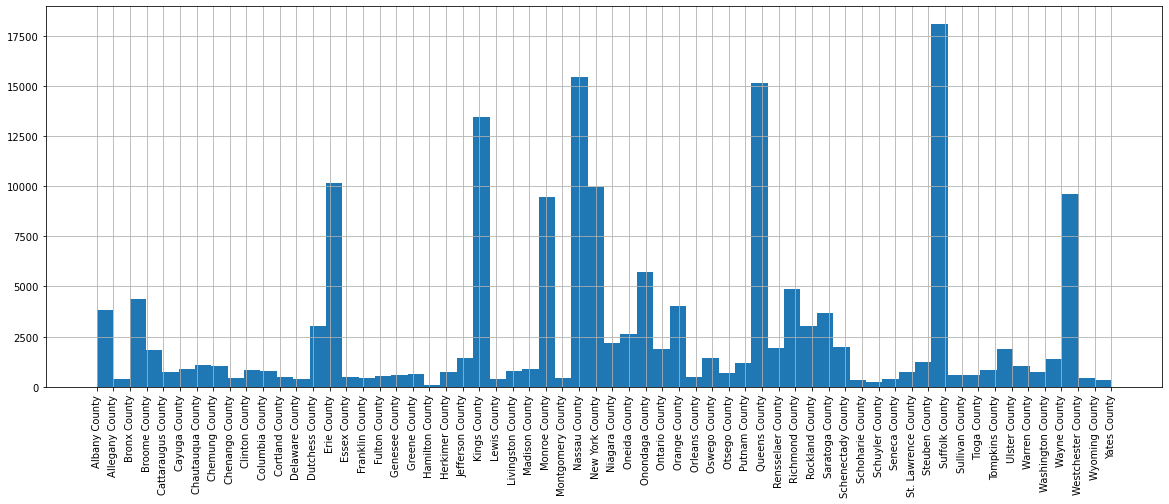

In [ ]:
ax = df['county_name'].sort_values().hist(bins = pd.Series(df.county_name.unique()).count(), figsize=[20,7], xrot = 90)
plt.show()

In [170]:
df.groupby('county_name')['county_name'].count().sort_values(ascending=False)

county_name
Suffolk County      18063
Nassau County       15431
Queens County       15142
Kings County        13436
Erie County         10134
                    ...  
Delaware County       367
Schoharie County      358
Yates County          344
Schuyler County       255
Hamilton County        91
Name: county_name, Length: 62, dtype: int64

In [171]:
# Applications by county and bank decisions

cou = []

for i in decisions:
    cou.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.county_name).count().sort_values(ascending=False))
    df_county = pd.DataFrame(cou).reset_index(drop = True)
result_county = pd.concat([dec, df_county.fillna(0).astype(int)], axis = 1)
result_county = result_county.transpose()
result_county

,0,1,2,3,4,5,6
0,Application approved but not accepted,Application denied by financial institution,Application withdrawn by applicant,File closed for incompleteness,Loan originated,Loan purchased by the institution,Preapproval request denied by financial instit...
Suffolk County,655,3202,1685,764,9104,2652,1
Queens County,564,3120,1523,785,6556,2594,0
Kings County,552,2649,1431,688,6032,2084,0
Nassau County,544,2554,1540,727,7691,2374,1
...,...,...,...,...,...,...,...
Franklin County,10,125,20,16,235,47,0
Wyoming County,9,96,35,8,262,50,0
Allegany County,9,92,21,11,235,19,0
Yates County,8,51,16,12,212,45,0


In [ ]:
df.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population', 'loan_approved'],
      dtype='object')

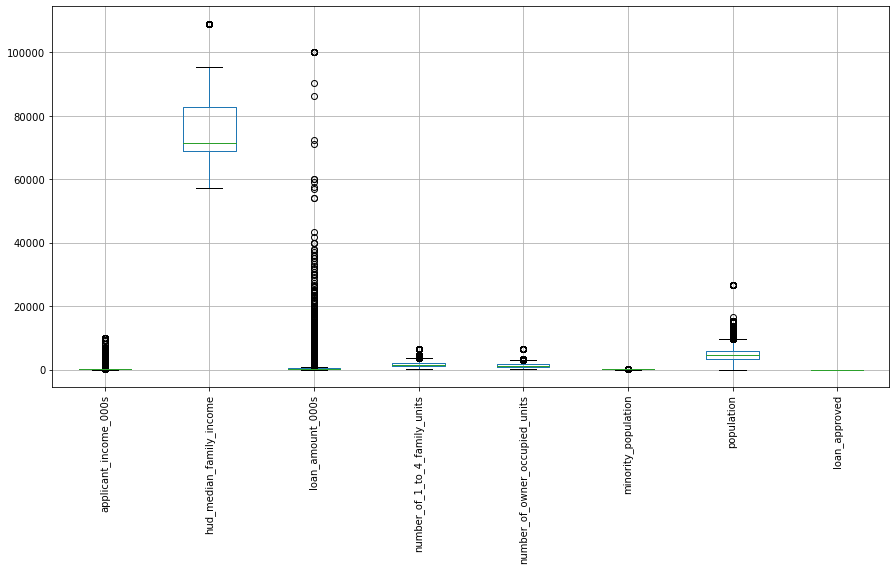

In [ ]:
ax = df.boxplot(figsize=[15,7], rot = 90)
plt.show()

In [ ]:
# Overview: Stats of APPROVED loans

df[df.loan_approved == 1].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,loan_approved
count,102163.000000,121277.000000,121407.000000,121129.000000,121193.000000,121269.000000,121269.000000,121407.0
mean,141.765395,78037.486086,337.908638,1531.911169,1238.559488,27.326559,4773.095292,1.0
std,265.213880,16178.179503,1224.349230,789.924154,604.919900,27.785663,1862.759431,0.0
min,1.000000,57200.000000,1.000000,6.000000,4.000000,0.340000,5.000000,1.0
25%,60.000000,69000.000000,108.000000,995.000000,782.000000,7.290000,3478.000000,1.0
50%,92.000000,71300.000000,210.000000,1546.000000,1217.000000,16.070000,4591.000000,1.0
75%,144.000000,82700.000000,367.000000,2022.000000,1657.000000,34.950001,5906.000000,1.0
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,99.930000,26588.000000,1.0


In [ ]:
# Overview: Stats of DENIED loans

df[df.loan_approved == 0].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,loan_approved
count,49181.000000,53901.000000,54455.000000,53822.000000,53827.000000,53897.000000,53897.000000,54455.0
mean,138.169232,78430.385336,322.985584,1475.220356,1159.601836,33.357297,4694.841605,0.0
std,288.869502,16253.764077,999.725357,796.389883,616.251010,31.245127,1913.931077,0.0
min,1.000000,57200.000000,1.000000,6.000000,3.000000,0.340000,1.000000,0.0
25%,53.000000,69700.000000,90.000000,913.000000,667.000000,8.920000,3374.000000,0.0
50%,85.000000,71300.000000,200.000000,1463.000000,1144.000000,20.360001,4477.000000,0.0
75%,137.000000,82700.000000,363.000000,1986.750000,1607.000000,49.330002,5857.000000,0.0
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000,0.0


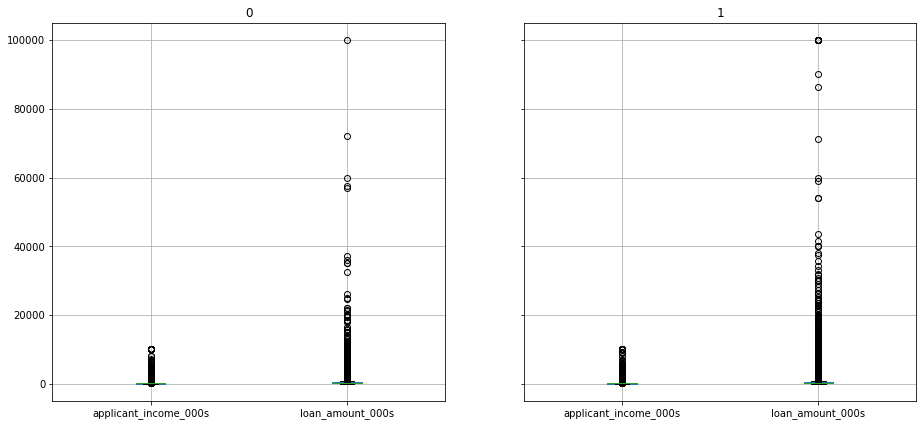

In [ ]:
ax = df[['applicant_income_000s', 'loan_amount_000s']].groupby(df.loan_approved).boxplot(figsize=[15,7])
plt.show()

In [ ]:
df_loan = df.copy()
df_loan = df_loan.drop(['agency_name', 'applicant_ethnicity_name', 'preapproval_name', 'co_applicant_ethnicity_name'], axis = 1)
df_loan.hud_median_family_income = df_loan.hud_median_family_income/1000

In [ ]:
# Replacing information about HOEPA loan with 0 (no) and 1 (yes)

df_loan = df_loan.replace('Not a HOEPA loan', 0)
df_loan = df_loan.replace('HOEPA loan', 1)

In [ ]:
df_loan.co_applicant_sex_name.unique()

array(['No co-applicant', 'Female', 'Not applicable', 'Male',
       'No information'], dtype=object)

In [ ]:
# Creating a column with information about number of total applicants

df_loan['no_applicants'] = np.where(
   (df_loan.co_applicant_sex_name == 'Female') | (df_loan.co_applicant_sex_name == 'Male') | (df_loan.co_applicant_sex_name == 'Not applicable'), 2, 1)

In [ ]:
df_loan.shape

(175862, 27)

In [ ]:
(df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0]*100

0    55.284257
1    44.715743
dtype: float64

In [ ]:
df_app0 = pd.DataFrame({'loan_denied': df_loan[df_loan.loan_approved == 0]['loan_approved'].groupby(df_loan.no_applicants).count()}).reset_index()
df_app1 = pd.DataFrame({'loan_approved': df_loan[df_loan.loan_approved == 1]['loan_approved'].groupby(df_loan.no_applicants).count()}).reset_index()

df_app = pd.concat([df_app0, df_app1.loan_approved], axis = 1)
df_app['applicantions_distribution_%'] = (df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0]*100
df_app['loan_denied_%'] = df_app.loan_denied / df_loan.shape[0]*100
df_app['loan_approved_%'] = df_app.loan_approved / df_loan.shape[0]*100
df_app = df_app[['no_applicants', 'applicantions_distribution_%', 'loan_approved', 'loan_approved_%', 'loan_denied', 'loan_denied_%']]

# approval_rate = loan_approved_% / applications_distribution_%
df_app['approval_rate_%'] = round((df_app.loan_approved / df_loan.shape[0]) / ((df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0])*100, 2)
# denial_rate = loan_denied_% / applications_distribution_%
df_app['denial_rate_%'] = round((df_app.loan_denied / df_loan.shape[0]) / ((df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0])*100, 2)

df_app

# The approval rate of 2 applicants (75,93%) is higher than with just 1 applicant (63,46%).


,no_applicants,applicantions_distribution_%,loan_approved,loan_approved_%,loan_denied,loan_denied_%,approval_rate_%,denial_rate_%
0,1,55.284257,61696,35.082053,35528,20.202204,63.46,36.54
1,2,44.715743,59711,33.953327,18927,10.762416,75.93,24.07


In [ ]:
df_loan[(df_loan.applicant_sex_name == 'Female') & (df_loan.no_applicants == 1) & (df_loan.loan_approved == 1)]['applicant_sex_name'].groupby(df_loan.applicant_race_name_1).count()

applicant_race_name_1
American Indian or Alaska Native                70
Asian                                         1630
Black or African American                     2235
Native Hawaiian or Other Pacific Islander       59
No information                                 847
Not applicable                                   5
White                                        16073
Name: applicant_sex_name, dtype: int64

In [ ]:
df_loan[df_loan.no_applicants == 2]['no_applicants'].count()

78638

In [ ]:
# How many applicants and co-applicants share their ethnicity / race?

df_race_equal = pd.DataFrame({'equal_race': df_loan[(df_loan.applicant_race_name_1 == df_loan.co_applicant_race_name_1) & (df_loan.no_applicants == 2)]['applicant_race_name_1'].groupby(df_loan.loan_approved).count()}).reset_index()
df_race_diff = pd.DataFrame({'different_race': df_loan[(df_loan.applicant_race_name_1 != df_loan.co_applicant_race_name_1) & (df_loan.no_applicants == 2)]['applicant_race_name_1'].groupby(df_loan.loan_approved).count()}).reset_index()
df_race = pd.concat([df_race_equal, df_race_diff.different_race], axis = 1)

# Percentage of applicants with equal / different race
 
df_race['equal_%'] = (df_race.equal_race / df_loan[df_loan.no_applicants == 2]['no_applicants'].count()) * 100
df_race['different_%'] = (df_race.different_race / df_loan[df_loan.no_applicants == 2]['no_applicants'].count()) * 100

# Equal / different ratio: Approved / denied applicants by equal / different race

df_race['equal_ratio'] = df_race.equal_race / (df_race.equal_race[0] + df_race.equal_race[1]) * 100
df_race['different_ratio'] = df_race.different_race / (df_race.different_race[0] + df_race.different_race[1]) * 100

df_race

# FINDING:
# While more than 3/4 of same race applicants recieve a positive loan decision, it is only 2/3 of those with different racial background.

,loan_approved,equal_race,different_race,equal_%,different_%,equal_ratio,different_ratio
0,0,17909,1018,22.773977,1.294540,23.685707,33.630657
1,1,57702,2009,73.376739,2.554745,76.314293,66.369343


In [ ]:
# Creating a function to count all combinations of applicants by ethnicity / race, sex, w/o co-applicants and by loan decision (approval / denial)

ethnicity = sorted(list(df_loan.applicant_race_name_1.unique()))

def ethnicity_race_f(column_name, sex, cosex, lo_ap):
    storage = []
    storage.append(column_name)
    for i in ethnicity:
        storage.append(df_loan[(df_loan.applicant_sex_name == sex) & (df_loan.co_applicant_sex_name == cosex) & (df_loan.loan_approved == lo_ap) & (df_loan.applicant_race_name_1 == i)]['applicant_sex_name'].count())
    
    storage = pd.DataFrame(storage)
    storage.columns = storage.iloc[0]
    storage = storage.drop(storage.index[0]).reset_index(drop = True)

    return(storage)


f = 'Female'
m = 'Male'
d = 'Not applicable'
ni = 'No information'
noco = 'No co-applicant'

# The following code can of course be put in a function with a for-loop and if-statements:

df_sexf_a = ethnicity_race_f('female_single_loan_approved', f, noco, 1)
df_sexf_d = ethnicity_race_f('female_single_loan_denied', f, noco, 0)
df_sexm_a = ethnicity_race_f('male_single_loan_approved', m, noco, 1)
df_sexm_d = ethnicity_race_f('male_single_loan_denied', m, noco, 0)
df_sexd_a = ethnicity_race_f('diverse_single_loan_approved', d, noco, 1)
df_sexd_d = ethnicity_race_f('diverse_single_loan_denied', d, noco, 0)
df_sexni_a = ethnicity_race_f('no_info_single_loan_approved', ni, noco, 1)
df_sexni_d = ethnicity_race_f('no_info_single_loan_denied', ni, noco, 0)

df_sexff_a = ethnicity_race_f('female-female_loan_approved', f, f, 1)
df_sexff_d = ethnicity_race_f('female-female_loan_denied', f, f, 0)
df_sexfm_a = ethnicity_race_f('female-male_loan_approved', f, m, 1)
df_sexfm_d = ethnicity_race_f('female-male_loan_denied', f, m, 0)
df_sexfd_a = ethnicity_race_f('female-diverse_loan_approved', f, d, 1)
df_sexfd_d = ethnicity_race_f('female-diverse_loan_denied', f, d, 0)
df_sexfni_a = ethnicity_race_f('female-no_info_loan_approved', f, ni, 1)
df_sexfni_d = ethnicity_race_f('female-no_info_loan_denied', f, ni, 0)

df_sexmf_a = ethnicity_race_f('male-female_loan_approved', m, f, 1)
df_sexmf_d = ethnicity_race_f('male-female_loan_denied', m, f, 0)
df_sexmm_a = ethnicity_race_f('male-male_loan_approved', m, m, 1)
df_sexmm_d = ethnicity_race_f('male-male_loan_denied', m, m, 0)
df_sexmd_a = ethnicity_race_f('male-diverse_loan_approved', m, d, 1)
df_sexmd_d = ethnicity_race_f('male-diverse_loan_denied', m, d, 0)
df_sexmni_a = ethnicity_race_f('male-no_info_loan_approved', m, ni, 1)
df_sexmni_d = ethnicity_race_f('male-no_info_loan_denied', m, ni, 0)

df_sexdf_a = ethnicity_race_f('diverse-female_loan_approved', d, f, 1)
df_sexdf_d = ethnicity_race_f('diverse-female_loan_denied', d, f, 0)
df_sexdm_a = ethnicity_race_f('diverse-male_loan_approved', d, m, 1)
df_sexdm_d = ethnicity_race_f('diverse-male_loan_denied', d, m, 0)
df_sexdd_a = ethnicity_race_f('diverse-diverse_loan_approved', d, d, 1)
df_sexdd_d = ethnicity_race_f('diverse-diverse_loan_denied', d, d, 0)
df_sexdni_a = ethnicity_race_f('diverse-no_info_loan_approved', d, ni, 1)
df_sexdni_d = ethnicity_race_f('diverse-no_info_loan_denied', d, ni, 0)

df_sexnif_a = ethnicity_race_f('no_info-female_loan_approved', ni, f, 1)
df_sexnif_d = ethnicity_race_f('no_info-female_loan_denied', ni, f, 0)
df_sexnim_a = ethnicity_race_f('no_info-male_loan_approved', ni, m, 1)
df_sexnim_d = ethnicity_race_f('no_info-male_loan_denied', ni, m, 0)
df_sexnid_a = ethnicity_race_f('no_info-diverse_loan_approved', ni, d, 1)
df_sexnid_d = ethnicity_race_f('no_info-diverse_loan_denied', ni, d, 0)
df_sexnini_a = ethnicity_race_f('no_info-no_info_loan_approved', ni, ni, 1)
df_sexnini_d = ethnicity_race_f('no_info-no_info_loan_denied', ni, ni, 0)

ethnicity = pd.DataFrame(ethnicity)
ethnicity.columns = ['race']
df_race_sex = pd.concat([ethnicity, df_sexf_a, df_sexf_d, df_sexm_a, df_sexm_d, df_sexd_a, df_sexd_d, df_sexni_a, df_sexni_d, df_sexff_a, df_sexff_d, 
                        df_sexfm_a, df_sexfm_d, df_sexfd_a, df_sexfd_d, df_sexfni_a, df_sexfni_d, df_sexmf_a, df_sexmf_d, df_sexmm_a, df_sexmm_d, df_sexmd_a, 
                        df_sexmd_d, df_sexmni_a, df_sexmni_d, df_sexdf_a, df_sexdf_d, df_sexdm_a, df_sexdm_d, df_sexdd_a, df_sexdd_d, df_sexdni_a, df_sexdni_d, 
                        df_sexnif_a, df_sexnif_d, df_sexnim_a, df_sexnim_d, df_sexnid_a, df_sexnid_d, df_sexnini_a, df_sexnini_d], axis = 1)


df_race_sex   

,race,female_single_loan_approved,female_single_loan_denied,male_single_loan_approved,male_single_loan_denied,diverse_single_loan_approved,diverse_single_loan_denied,no_info_single_loan_approved,no_info_single_loan_denied,female-female_loan_approved,...,diverse-no_info_loan_approved,diverse-no_info_loan_denied,no_info-female_loan_approved,no_info-female_loan_denied,no_info-male_loan_approved,no_info-male_loan_denied,no_info-diverse_loan_approved,no_info-diverse_loan_denied,no_info-no_info_loan_approved,no_info-no_info_loan_denied
0,American Indian or Alaska Native,69,115,121,152,0,0,3,5,8,...,0,0,0,0,0,1,0,0,3,1
1,Asian,1623,903,2539,1452,0,0,5,11,139,...,0,0,0,0,0,0,0,0,1,4
2,Black or African American,2227,2075,1930,1787,0,0,7,7,229,...,0,0,0,0,0,0,0,0,1,3
3,Native Hawaiian or Other Pacific Islander,59,74,103,79,1,0,1,1,6,...,0,0,0,0,0,0,0,0,0,0
4,No information,835,978,1317,1447,1,2,2973,2950,52,...,0,0,84,50,54,30,11,3,2539,1801
5,Not applicable,5,0,6,4,3524,547,1,0,0,...,7,6,0,0,1,0,0,0,0,0
6,White,16003,7584,25361,13233,1,1,52,50,978,...,0,0,11,5,3,8,0,0,26,20


In [ ]:
# Creation of a factor 'income_loan_ratio': Is the reason for loan approval a mishap between the applicant's income and the loan hight? 

df_loan['income_loan_ratio'] = df_loan.loan_amount_000s / df_loan.applicant_income_000s

,action_taken_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_race_name_1,co_applicant_sex_name,county_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3,...,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,loan_approved,income_loan_ratio
0,Application denied by financial institution,White,Female,176.0,No co-applicant,No co-applicant,Chautauqua County,Collateral,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60.0,235,2605.0,930.0,6.850000,2979.0,0,1.335227
1,Application withdrawn by applicant,White,Male,53.0,No co-applicant,No co-applicant,Erie County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69.0,108,2053.0,821.0,33.580002,4416.0,0,2.037736
2,Loan originated,White,Male,223.0,White,Female,Queens County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71.3,659,497.0,387.0,49.959999,1363.0,1,2.955157
3,Loan originated,Asian,Female,43.0,No co-applicant,No co-applicant,Queens County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71.3,103,251.0,558.0,32.090000,1960.0,1,2.395349
4,Loan originated,White,Male,72.0,No co-applicant,No co-applicant,Steuben County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60.0,45,1514.0,1003.0,2.120000,3391.0,1,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,White,Female,118.0,No co-applicant,No co-applicant,Nassau County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Affiliate institution,109.0,300,1470.0,1337.0,17.110001,4448.0,1,2.542373
175858,Loan originated,White,Female,27.0,No co-applicant,No co-applicant,Monroe County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69.7,88,1719.0,1490.0,16.040001,4658.0,1,3.259259
175859,Loan originated,White,Male,215.0,White,Female,Nassau County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109.0,205,1547.0,1455.0,7.730000,4671.0,1,0.953488
175860,Loan originated,White,Male,116.0,No co-applicant,No co-applicant,Rockland County,NaN,NaN,NaN,...,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71.3,200,1743.0,1534.0,19.969999,5484.0,1,1.724138


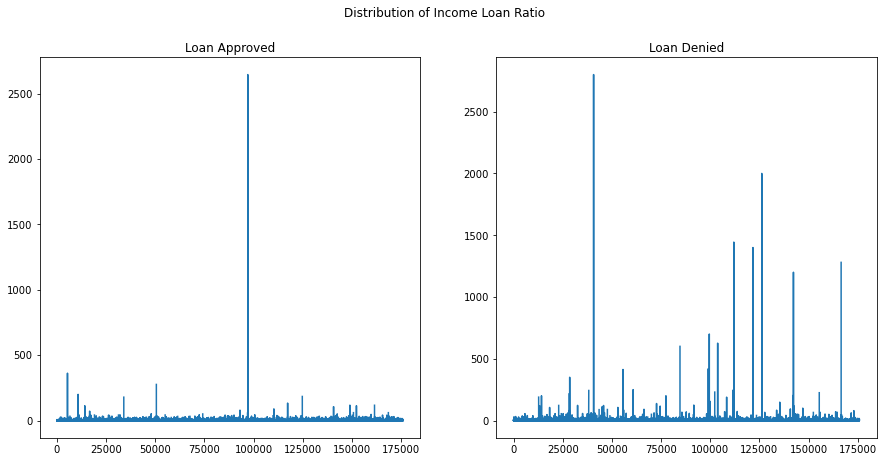

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,7])
fig.suptitle('Distribution of Income Loan Ratio')
ax1.plot(df_loan_1['income_loan_ratio'])
ax1.set_title('Loan Approved')
ax2.plot(df_loan_0['income_loan_ratio'])
ax2.set_title('Loan Denied')

plt.show()

In [ ]:
df_loan[df_loan.income_loan_ratio > 1000][['income_loan_ratio', 'applicant_income_000s', 'loan_amount_000s']]

,income_loan_ratio,applicant_income_000s,loan_amount_000s
40705,2800.0,1.0,2800
97000,2647.0,1.0,2647
111995,1444.0,1.0,1444
121717,1400.0,1.0,1400
126205,2000.0,1.0,2000
142316,1200.0,1.0,1200
166563,1280.0,1.0,1280


In [ ]:
df_loan[['income_loan_ratio', 'applicant_income_000s', 'loan_amount_000s', 'loan_approved']].groupby('loan_approved').mean()

,income_loan_ratio,applicant_income_000s,loan_amount_000s
loan_approved,,,
0,3.093936,138.169232,322.985584
1,2.452838,141.765395,337.908638


In [ ]:
df_loan[df_loan.applicant_income_000s < 10][['income_loan_ratio', 'applicant_income_000s', 'loan_amount_000s', 'loan_approved']].groupby('loan_approved').mean()

,income_loan_ratio,applicant_income_000s,loan_amount_000s
loan_approved,,,
0,80.185506,5.441176,168.363971
1,55.053296,5.885714,137.619048


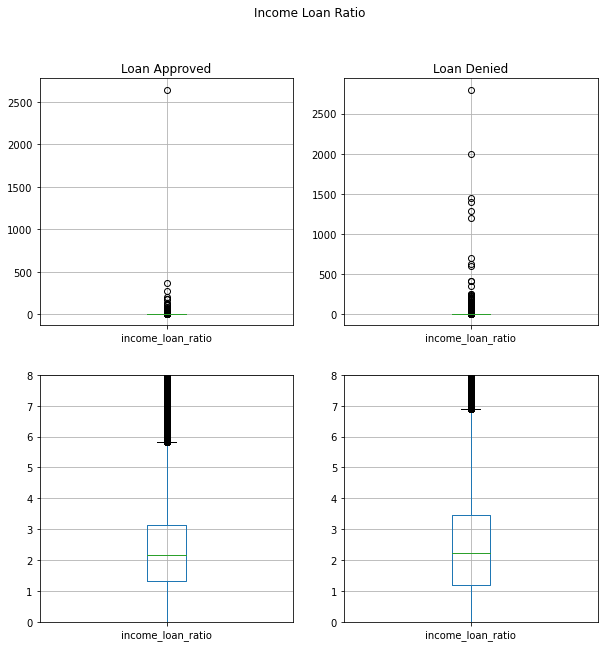

In [ ]:
fig, axes = plt.subplots(2,2, figsize=[10,10]) # create 2x2 array of subplots

fig.suptitle('Income Loan Ratio')
df_loan_1.boxplot(column='income_loan_ratio', ax=axes[0][0]) # add boxplot to 1st subplot
df_loan_0.boxplot(column='income_loan_ratio', ax=axes[0][1]) # add boxplot to 2nd subplot
df_loan_1.boxplot(column='income_loan_ratio', ax=axes[1][0]) # add boxplot to 1st subplot
df_loan_0.boxplot(column='income_loan_ratio', ax=axes[1][1]) # add boxplot to 2nd subplot
axes[0][0].set_title('Loan Approved')
axes[0][1].set_title('Loan Denied')
axes[1][0].set_ylim(0, 8)
axes[1][1].set_ylim(0, 8)

plt.show()